## Analysis of air quality of Bhopal

In this project I have analysed data pertaining to air quality of Bhopal, capital of Madhya Pradesh, India. Dataset used in this project was collected from https://aqicn.org/city/india/bhopal/t-t-nagar web address. The objective of this project was to see variation in different pollutants over months. The data was collected from 2 December 2019 to 1 April 2021. Libraries used in this project were numpy, pandas, matplotlib and seaborn.

### Importing relevant libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

### Reading and cleaning the data

Dataset was downloaded earlier, so it was present locally. I just uploaded the data into Jupyter notebook. I used read_csv method of pandas library to load csv file into our project.

In [2]:
aqi_bhopal_df = pd.read_csv('t-t nagar, bhopal, india-air-quality.csv')

In [3]:
aqi_bhopal_df

,date,pm25,pm10,o3,no2,so2,co
0,2021/4/1,120,89,62,13,11,6
1,2021/4/2,117,127,63,23,11,11
2,2021/4/3,139,93,63,13,6,6
3,2021/4/4,122,103,58,18,9,10
4,2021/4/5,131,99,43,9,5,6
...,...,...,...,...,...,...,...
484,2019/12/28,117,78,31,20,3,7
485,2019/12/29,145,,,,,
486,2020/4/6,,66,31,6,8,2
487,2019/12/31,,96,20,18,1,10


In [4]:
aqi_bhopal_df.columns

Index(['date', ' pm25', ' pm10', ' o3', ' no2', ' so2', ' co'], dtype='object')

In [5]:
aqi_bhopal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    489 non-null    object
 1    pm25   489 non-null    object
 2    pm10   489 non-null    object
 3    o3     489 non-null    object
 4    no2    489 non-null    object
 5    so2    489 non-null    object
 6    co     489 non-null    object
dtypes: object(7)
memory usage: 26.9+ KB


In [6]:
## I created a copy of the dataset so that our original file should remain unaltered.
aqi_bhopal_df1 = aqi_bhopal_df.copy()

In [7]:
aqi_bhopal_df1

,date,pm25,pm10,o3,no2,so2,co
0,2021/4/1,120,89,62,13,11,6
1,2021/4/2,117,127,63,23,11,11
2,2021/4/3,139,93,63,13,6,6
3,2021/4/4,122,103,58,18,9,10
4,2021/4/5,131,99,43,9,5,6
...,...,...,...,...,...,...,...
484,2019/12/28,117,78,31,20,3,7
485,2019/12/29,145,,,,,
486,2020/4/6,,66,31,6,8,2
487,2019/12/31,,96,20,18,1,10


Since data type of all the columns are of object type in the csv file, it is very necessary to change data type of all the columns for further operations.

In [8]:
aqi_bhopal_df1['date'] = pd.to_datetime(aqi_bhopal_df1.date, errors='coerce')
aqi_bhopal_df1[' o3'] = pd.to_numeric(aqi_bhopal_df1[" o3"], errors='coerce')
aqi_bhopal_df1[' so2'] = pd.to_numeric(aqi_bhopal_df1[" so2"], errors='coerce')
aqi_bhopal_df1[' no2'] = pd.to_numeric(aqi_bhopal_df1[" no2"], errors='coerce')
aqi_bhopal_df1[' co'] = pd.to_numeric(aqi_bhopal_df1[" co"], errors='coerce')
aqi_bhopal_df1[' pm10'] = pd.to_numeric(aqi_bhopal_df1[" pm10"], errors='coerce')
aqi_bhopal_df1[' pm25'] = pd.to_numeric(aqi_bhopal_df1[" pm25"], errors='coerce')

In [9]:
## You can observe the change in data types of columns.
aqi_bhopal_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    489 non-null    datetime64[ns]
 1    pm25   486 non-null    float64       
 2    pm10   486 non-null    float64       
 3    o3     486 non-null    float64       
 4    no2    485 non-null    float64       
 5    so2    486 non-null    float64       
 6    co     482 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 26.9 KB


In [10]:
## Let's take a random sample from dataset.
aqi_bhopal_df1.sample(10)

,date,pm25,pm10,o3,no2,so2,co
393,2020-01-23,145.0,101.0,36.0,24.0,7.0,11.0
349,2020-06-09,57.0,44.0,25.0,5.0,6.0,4.0
374,2020-01-04,174.0,83.0,29.0,20.0,3.0,9.0
394,2020-01-24,123.0,133.0,37.0,27.0,5.0,13.0
488,2019-12-02,NaN,106.0,24.0,35.0,6.0,14.0
66,2021-02-24,111.0,89.0,47.0,11.0,8.0,4.0
91,2021-01-24,132.0,143.0,37.0,7.0,7.0,18.0
390,2020-01-20,125.0,91.0,29.0,20.0,7.0,9.0
39,2021-03-28,101.0,86.0,51.0,20.0,11.0,6.0
226,2020-08-02,55.0,27.0,21.0,1.0,5.0,3.0


You can observe that header in our dataset contains unnecessary spaces. So I remove those defects by renaming column names.

In [11]:
aqi_bhopal_df1.rename(columns = {' pm25':'pm25'},inplace = True)
aqi_bhopal_df1.rename(columns = {' pm10':'pm10'},inplace = True)
aqi_bhopal_df1.rename(columns = {' so2':'so2'},inplace = True)
aqi_bhopal_df1.rename(columns = {' no2':'no2'},inplace = True)
aqi_bhopal_df1.rename(columns = {' o3':'o3'},inplace = True)
aqi_bhopal_df1.rename(columns = {' co':'co'},inplace = True)

In [12]:
aqi_bhopal_df1

,date,pm25,pm10,o3,no2,so2,co
0,2021-04-01,120.0,89.0,62.0,13.0,11.0,6.0
1,2021-04-02,117.0,127.0,63.0,23.0,11.0,11.0
2,2021-04-03,139.0,93.0,63.0,13.0,6.0,6.0
3,2021-04-04,122.0,103.0,58.0,18.0,9.0,10.0
4,2021-04-05,131.0,99.0,43.0,9.0,5.0,6.0
...,...,...,...,...,...,...,...
484,2019-12-28,117.0,78.0,31.0,20.0,3.0,7.0
485,2019-12-29,145.0,NaN,NaN,NaN,NaN,NaN
486,2020-04-06,NaN,66.0,31.0,6.0,8.0,2.0
487,2019-12-31,NaN,96.0,20.0,18.0,1.0,10.0


In [13]:
aqi_bhopal_df1.describe()

,pm25,pm10,o3,no2,so2,co
count,486.000000,486.000000,486.000000,485.000000,486.000000,482.000000
mean,109.930041,79.707819,34.802469,11.911340,7.576132,7.101660
std,43.031171,33.158927,11.603682,8.618784,3.159239,3.363624
min,19.000000,13.000000,9.000000,1.000000,1.000000,2.000000
25%,74.000000,55.000000,26.000000,4.000000,6.000000,4.000000
50%,113.000000,84.500000,36.000000,11.000000,7.000000,7.000000
75%,143.000000,99.000000,43.000000,18.000000,9.000000,9.000000
max,224.000000,225.000000,69.000000,55.000000,26.000000,18.000000


There are some missing values in our dataset so it will be very useful to remove those values. This will help in further analysis.

In [14]:
aqi_bhopal_df2 = aqi_bhopal_df1.dropna()

In [15]:
aqi_bhopal_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 478 entries, 0 to 484
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    478 non-null    datetime64[ns]
 1   pm25    478 non-null    float64       
 2   pm10    478 non-null    float64       
 3   o3      478 non-null    float64       
 4   no2     478 non-null    float64       
 5   so2     478 non-null    float64       
 6   co      478 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 29.9 KB


In [16]:
aqi_bhopal_df2.describe()

,pm25,pm10,o3,no2,so2,co
count,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000
mean,110.548117,79.922594,35.018828,11.899582,7.600418,7.098326
std,42.746397,33.070794,11.489566,8.559225,3.162503,3.349138
min,19.000000,13.000000,9.000000,1.000000,2.000000,2.000000
25%,75.000000,55.250000,27.000000,4.000000,6.000000,4.000000
50%,113.000000,85.000000,36.000000,11.000000,7.000000,7.000000
75%,143.000000,99.000000,43.000000,18.000000,9.000000,9.000000
max,224.000000,225.000000,69.000000,55.000000,26.000000,18.000000


Next, I tried to aggregate our data on the basis of time. This will add 3 different columns for year, month, number of days from starting of dataset and it's position in week.

In [17]:
aqi_bhopal_df2['year'] = pd.DatetimeIndex(aqi_bhopal_df2.date).year
aqi_bhopal_df2['month'] = pd.DatetimeIndex(aqi_bhopal_df2.date).month
aqi_bhopal_df2['day'] = pd.DatetimeIndex(aqi_bhopal_df2.date).day
aqi_bhopal_df2['weekday'] = pd.DatetimeIndex(aqi_bhopal_df2.date).weekday

<ipython-input-17-14788cf1be54>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aqi_bhopal_df2['year'] = pd.DatetimeIndex(aqi_bhopal_df2.date).year
<ipython-input-17-14788cf1be54>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aqi_bhopal_df2['month'] = pd.DatetimeIndex(aqi_bhopal_df2.date).month
<ipython-input-17-14788cf1be54>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

In [18]:
## I have used groupby method to build a dataframe which will provide air pollutant information on the basis of months.
aqi_bhopal_df2_mean = aqi_bhopal_df2.groupby('month')[['pm25','pm10','so2','no2','o3']].mean()

In [19]:
aqi_bhopal_df2

,date,pm25,pm10,o3,no2,so2,co,year,month,day,weekday
0,2021-04-01,120.0,89.0,62.0,13.0,11.0,6.0,2021,4,1,3
1,2021-04-02,117.0,127.0,63.0,23.0,11.0,11.0,2021,4,2,4
2,2021-04-03,139.0,93.0,63.0,13.0,6.0,6.0,2021,4,3,5
3,2021-04-04,122.0,103.0,58.0,18.0,9.0,10.0,2021,4,4,6
4,2021-04-05,131.0,99.0,43.0,9.0,5.0,6.0,2021,4,5,0
...,...,...,...,...,...,...,...,...,...,...,...
480,2019-12-24,157.0,107.0,16.0,18.0,4.0,10.0,2019,12,24,1
481,2019-12-25,182.0,89.0,31.0,22.0,5.0,9.0,2019,12,25,2
482,2019-12-26,153.0,82.0,32.0,24.0,6.0,8.0,2019,12,26,3
483,2019-12-27,129.0,66.0,32.0,19.0,6.0,7.0,2019,12,27,4


In [20]:
aqi_bhopal_df2_mean

,pm25,pm10,so2,no2,o3
month,,,,,
1,151.177419,99.919355,7.693548,16.887097,33.548387
2,124.157895,95.491228,10.368421,15.754386,41.298246
3,101.793103,83.931034,8.275862,10.982759,41.448276
4,116.428571,87.714286,8.228571,6.828571,42.828571
5,70.548387,62.580645,6.032258,3.032258,38.741935
6,57.633333,39.666667,6.600000,3.933333,25.566667
7,54.071429,35.785714,6.178571,2.857143,21.964286
8,42.033333,27.566667,5.900000,2.266667,14.733333
9,83.766667,56.300000,5.766667,5.833333,26.366667


## Conclusion

In the following section we will see variation of various air pollutants over the months or we can say monthly variation.


#### Ozone

We can see from the bar plot that concentraion of ozone gets reduced from months 6 to 9. These are the months of rainy season in Bhopal. We can correlate from the graph below that in rainy season ozone contributes very less to air pollution of Bhopal.

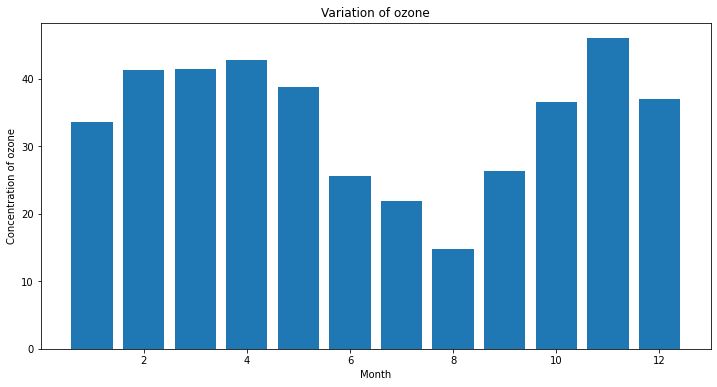

In [21]:
x = aqi_bhopal_df2_mean.index
y = aqi_bhopal_df2_mean.o3
plt.figure(figsize=(12, 6))
plt.title("Variation of ozone")
plt.xlabel('Month')
plt.ylabel('Concentration of ozone')
plt.bar(x,y);

#### Pariculate matter

Variation of particulate matter throughout the months is similar to ozone. Since there was two types of particulate matter present in this dataset I have tried to show the variation among them. Although pm25 is present more than pm10 but they follow similar pattern.

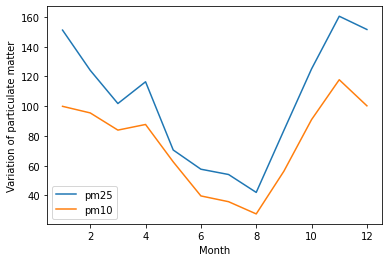

In [22]:
plt.plot(aqi_bhopal_df2_mean.index, aqi_bhopal_df2_mean.pm25)
plt.plot(aqi_bhopal_df2_mean.index, aqi_bhopal_df2_mean.pm10)
plt.xlabel('Month')
plt.ylabel('Variation of particulate matter')
plt.legend(['pm25', 'pm10']);

#### Pollutants contributing to acid rain

In this section I have analysed sulphur dioxide(so2) and nitrogen dioxide(no2). These gases are one of the main contributor of acid rain. I have used stacked barplot for representing both so2 and no2 in same graph and to show their variation throughout the months. You can see the concentration of both of these pollutants was quiet less for months May, June, July, August, September. Rain may be one of the reason for this less concentration but we can also note that these were the months when there was lockdown. In lockdown number of vehicles were quiet less on the roads and most of the industries were closed.

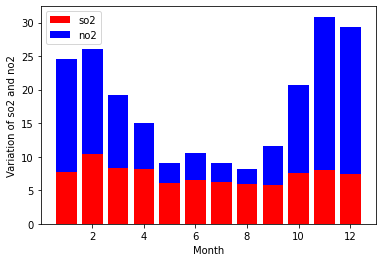

In [23]:
x = aqi_bhopal_df2_mean.index
y1 = aqi_bhopal_df2_mean.so2
y2 = aqi_bhopal_df2_mean.no2
plt.bar(x, y1, color='r')
plt.bar(x, y2, bottom=y1, color='b')
plt.legend(['so2', 'no2'])
plt.xlabel('Month')
plt.ylabel('Variation of so2 and no2');